# Linear Regression

In [1]:
import numpy as np

class LinearRegressor:
    def __init__(self, lr=0.01, epochs=1000, grad_desc=False):
        self.lr = lr
        self.epochs = epochs
        self.grad_desc = grad_desc
    
    def fit(self, X, y):
        N, self.p = X.shape
        X = self._pad_ones(X)
        if self.grad_desc:
            self.beta = np.random.rand(self.p + 1, 1)
            for _ in range(self.epochs):
                y_hat = np.dot(X, self.beta)
                self.beta -= (self.lr / N) * np.dot(X.T, y_hat - y)                
        else:
            self.beta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))            
        
    def predict(self, X):
        if X.shape[1] != self.p:
            raise ValueError
        X = self._pad_ones(X)
        return np.dot(X, self.beta)

    def _pad_ones(self, X):
        N = X.shape[0]
        X = np.concatenate([np.ones([N, 1]), X], axis=1)
        return X

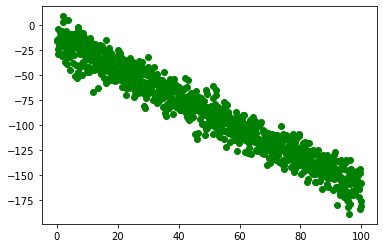

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

m = -1.5
b = -13
X = np.expand_dims(np.linspace(0, 100, 1000), axis=1)
y = m * X + b + np.random.normal(scale=10, size=X.shape)

plt.scatter(X, y, c='green')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.25)

clf = LinearRegressor(epochs=50000, lr=0.0005, grad_desc=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

#mse = mean_squared_error(y_val, y_pred)
#mse
clf.beta

array([[-14.11096768],
       [ -1.4835578 ]])

In [4]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_val)
mean_squared_error(y_val, y_pred)

116.90495222875649

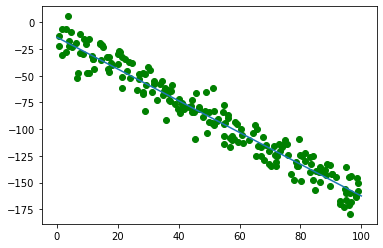

In [5]:
plt.scatter(X_val, y_val, c='green')
X_tilde = np.expand_dims(np.linspace(0, 100, 100), axis=0).T
y_tilde = clf.predict(X_tilde)
plt.plot(X_tilde.squeeze(), y_tilde.squeeze())

plt.show()